In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append('..')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [4]:
data = pd.read_json('../data/train_reviews.json')
data.sample(5)

,date,title,text,url,stars
1009,2017-10-18 16:48:40+00:00,Extremely horrible customer service,Extremely horrible customer service. Does not ...,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-1 star-rating--medium
1509,2017-05-25 17:49:24+00:00,Absolutely terrible service,Absolutely terrible service. I commute daily u...,https://uk.trustpilot.com/review/www.southernr...,star-rating star-rating-1 star-rating--medium
310,2018-03-31 14:11:54+00:00,Timetable and booking information unable to ac...,The UK has the worst national rail service Far...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-2 star-rating--medium
916,2015-07-05 18:30:29+00:00,First Class,What a con. Thought I was going to be given th...,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-2 star-rating--medium
1640,2016-07-04 17:40:39+00:00,Have i got a story for you...,Well I bought a monthly season ticket for 460....,https://uk.trustpilot.com/review/www.southernr...,star-rating star-rating-1 star-rating--medium


In [5]:
data.shape

(2021, 5)

In [6]:
data['text'].apply(lambda x: len(x)).describe()

count    2021.000000
mean      331.988125
std       336.289613
min         5.000000
25%       104.000000
50%       232.000000
75%       440.000000
max      3773.000000
Name: text, dtype: float64

In [7]:
# checking for any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    2021 non-null   datetime64[ns, UTC]
 1   title   2021 non-null   object             
 2   text    2021 non-null   object             
 3   url     2021 non-null   object             
 4   stars   2021 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 79.1+ KB


In [8]:
# from the 'url' column we can extract the train company names for which the reviews were written and add it
# to our dataframe
find_company_name = re.compile(r'review/(?:www\.)?(\w+)\.')

def search_company_name(url):
    result = find_company_name.search(url)
    
    if result:
        if result.group(1)=='buytickets':
            return 'crosscountrytrains'
        return result.group(1)
    
data['company_name'] = data['url'].apply(search_company_name)

data.sample(5)

,date,title,text,url,stars,company_name
845,2017-03-19 17:34:54+00:00,Worse than trains in India,"Worthy of particular contempt was a smelly, un...",https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-1 star-rating--medium,virgintrains
1653,2016-06-11 04:42:22+00:00,Unbelievable !!!,Let me start by saying I'm not a person who co...,https://uk.trustpilot.com/review/www.southernr...,star-rating star-rating-1 star-rating--medium,southernrailway
1407,2018-06-23 16:29:56+00:00,outstanding refund,On 10th May I received a refund from Virgin fo...,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-1 star-rating--medium,virgintrains
66,2018-01-24 16:35:43+00:00,Railcard users beware,"Railcard users beware, Caledonian Sleeper have...",https://uk.trustpilot.com/review/sleeper.scot,star-rating star-rating-1 star-rating--medium,sleeper
628,2017-08-25 10:27:44+00:00,VERY UNHAPPY!,VERY UNHAPPY!,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-1 star-rating--medium,virgintrains


In [9]:
# similar to above, we can extract the rating given alogside each review and add it to our dataframe
find_rating = re.compile(r'star-rating-(\d)')

def search_company_rating(x):
    result = find_rating.search(x)
    
    if result:
        return result.group(1)
    
data['rating'] = data['stars'].apply(search_company_rating)
data.sample(5)

,date,title,text,url,stars,company_name,rating
1059,2017-07-25 11:17:40+00:00,I wouldn't usually leave 1 star but ...,"Really, really poor. I wasn't even able to get...",https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-1 star-rating--medium,virgintrainseastcoast,1
516,2018-03-11 07:38:11+00:00,Difficult to love,Virgin Trains are one of those frustrating com...,https://uk.trustpilot.com/review/www.virgintra...,star-rating star-rating-3 star-rating--medium,virgintrains,3
1586,2018-07-04 21:46:12+00:00,nine times out of ten as I approach any…,nine times out of ten as I approach any statio...,https://uk.trustpilot.com/review/www.southernr...,star-rating star-rating-1 star-rating--medium,southernrailway,1
130,2018-07-04 07:08:13+00:00,Always cancel always delayed never…,Always cancel always delayed never travel in y...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium,nationalrail,1
1583,2018-07-05 10:39:51+00:00,Food Service was Excellent...Varavel…,Food Service was Excellent...Varavel Express,https://uk.trustpilot.com/review/www.southernr...,star-rating star-rating-4 star-rating--medium,southernrailway,4


In [10]:
data_clean = data.drop_duplicates(['text','company_name'])
data_clean.shape

(1440, 7)

Let's have a look at how the reviews are distributed amongst the train companies.

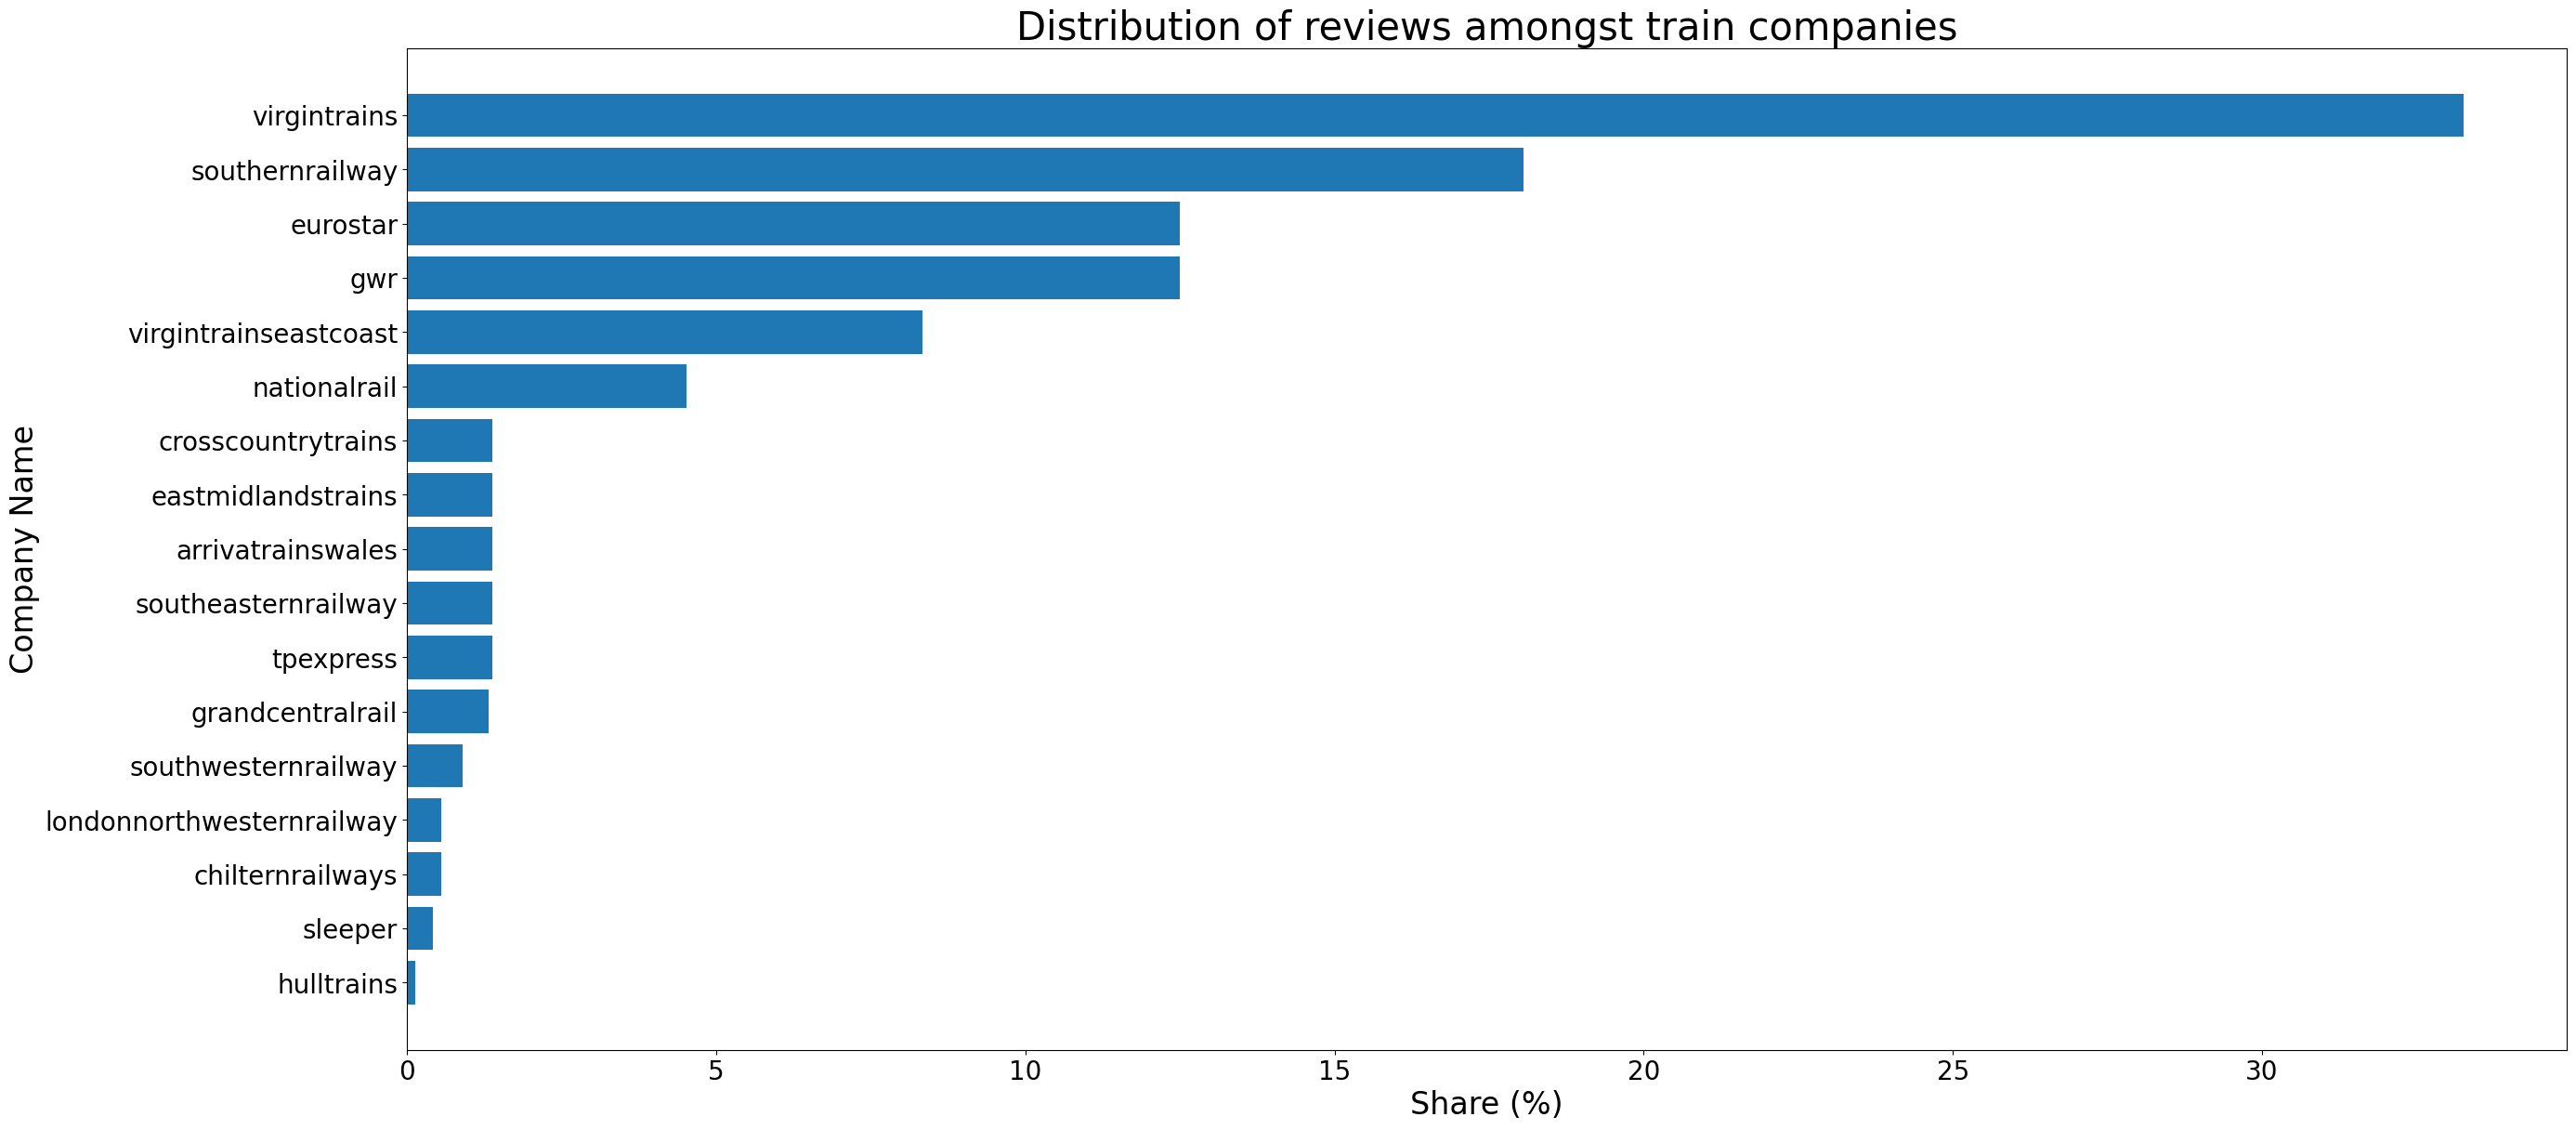

In [11]:
count = data_clean['company_name'].value_counts(ascending=True)

plt.figure(figsize=(30,14))

plt.barh(count.keys().tolist(),count.values*100/sum(count.values))
plt.title('Distribution of reviews amongst train companies',fontsize=30)
plt.ylabel('Company Name',fontsize=24)
plt.xlabel('Share (%)',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

We can also represent the above using a pie chart for a more visual impact. From both plots we can see that the top-6 (virgintrains, southernrailway, gwr, eurostar, virgintrainseastcoast, nationalrail) dominate most of the comments.

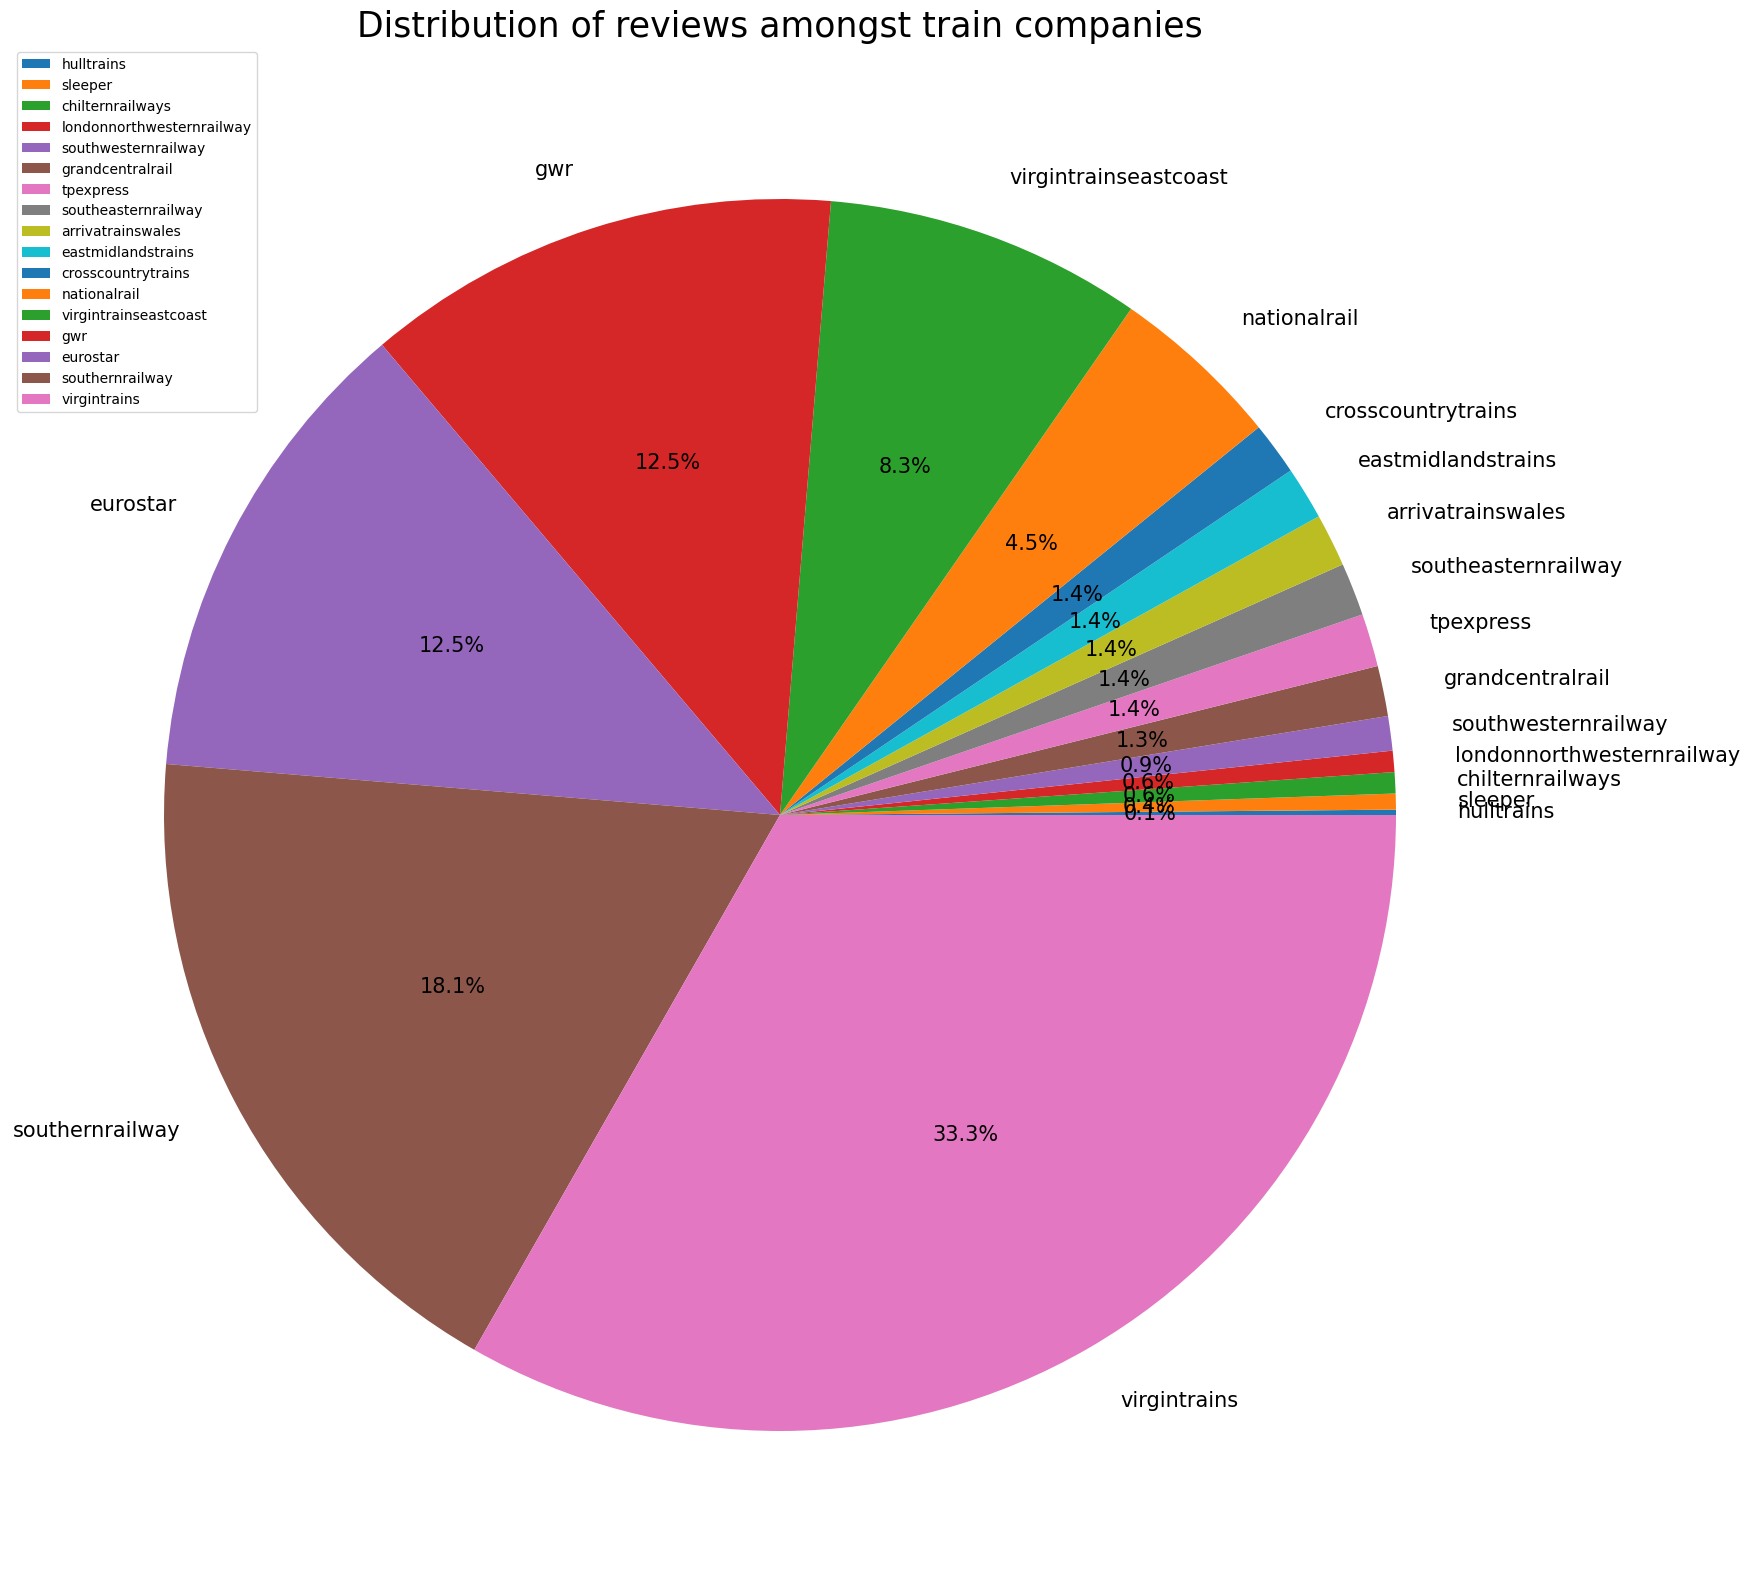

In [12]:
plt.figure(figsize=(20,20))

wedge_sizes = list(count.values)
wedge_labels = list(count.index.tolist())

plt.pie(x=wedge_sizes, labels=wedge_labels, autopct='%1.1f%%',textprops={'fontsize':15})
plt.title('Distribution of reviews amongst train companies',fontsize=25)
plt.legend(fontsize=10, loc='upper left')
plt.show()

We can also quickly have a look at the 'sentiment' of the reviews, considering rating 1 as super negative and rating 5 as super positive.

In [13]:
data_clean.rating.value_counts()

rating
1    1128
5     121
2     107
4      45
3      39
Name: count, dtype: int64

We observe from the plot below that the overwhelming amount of the reviews (~78%) is negative - this informs us that we should look for topics in the data about negative experiences, e.g. train cancellation, refund problems etc.

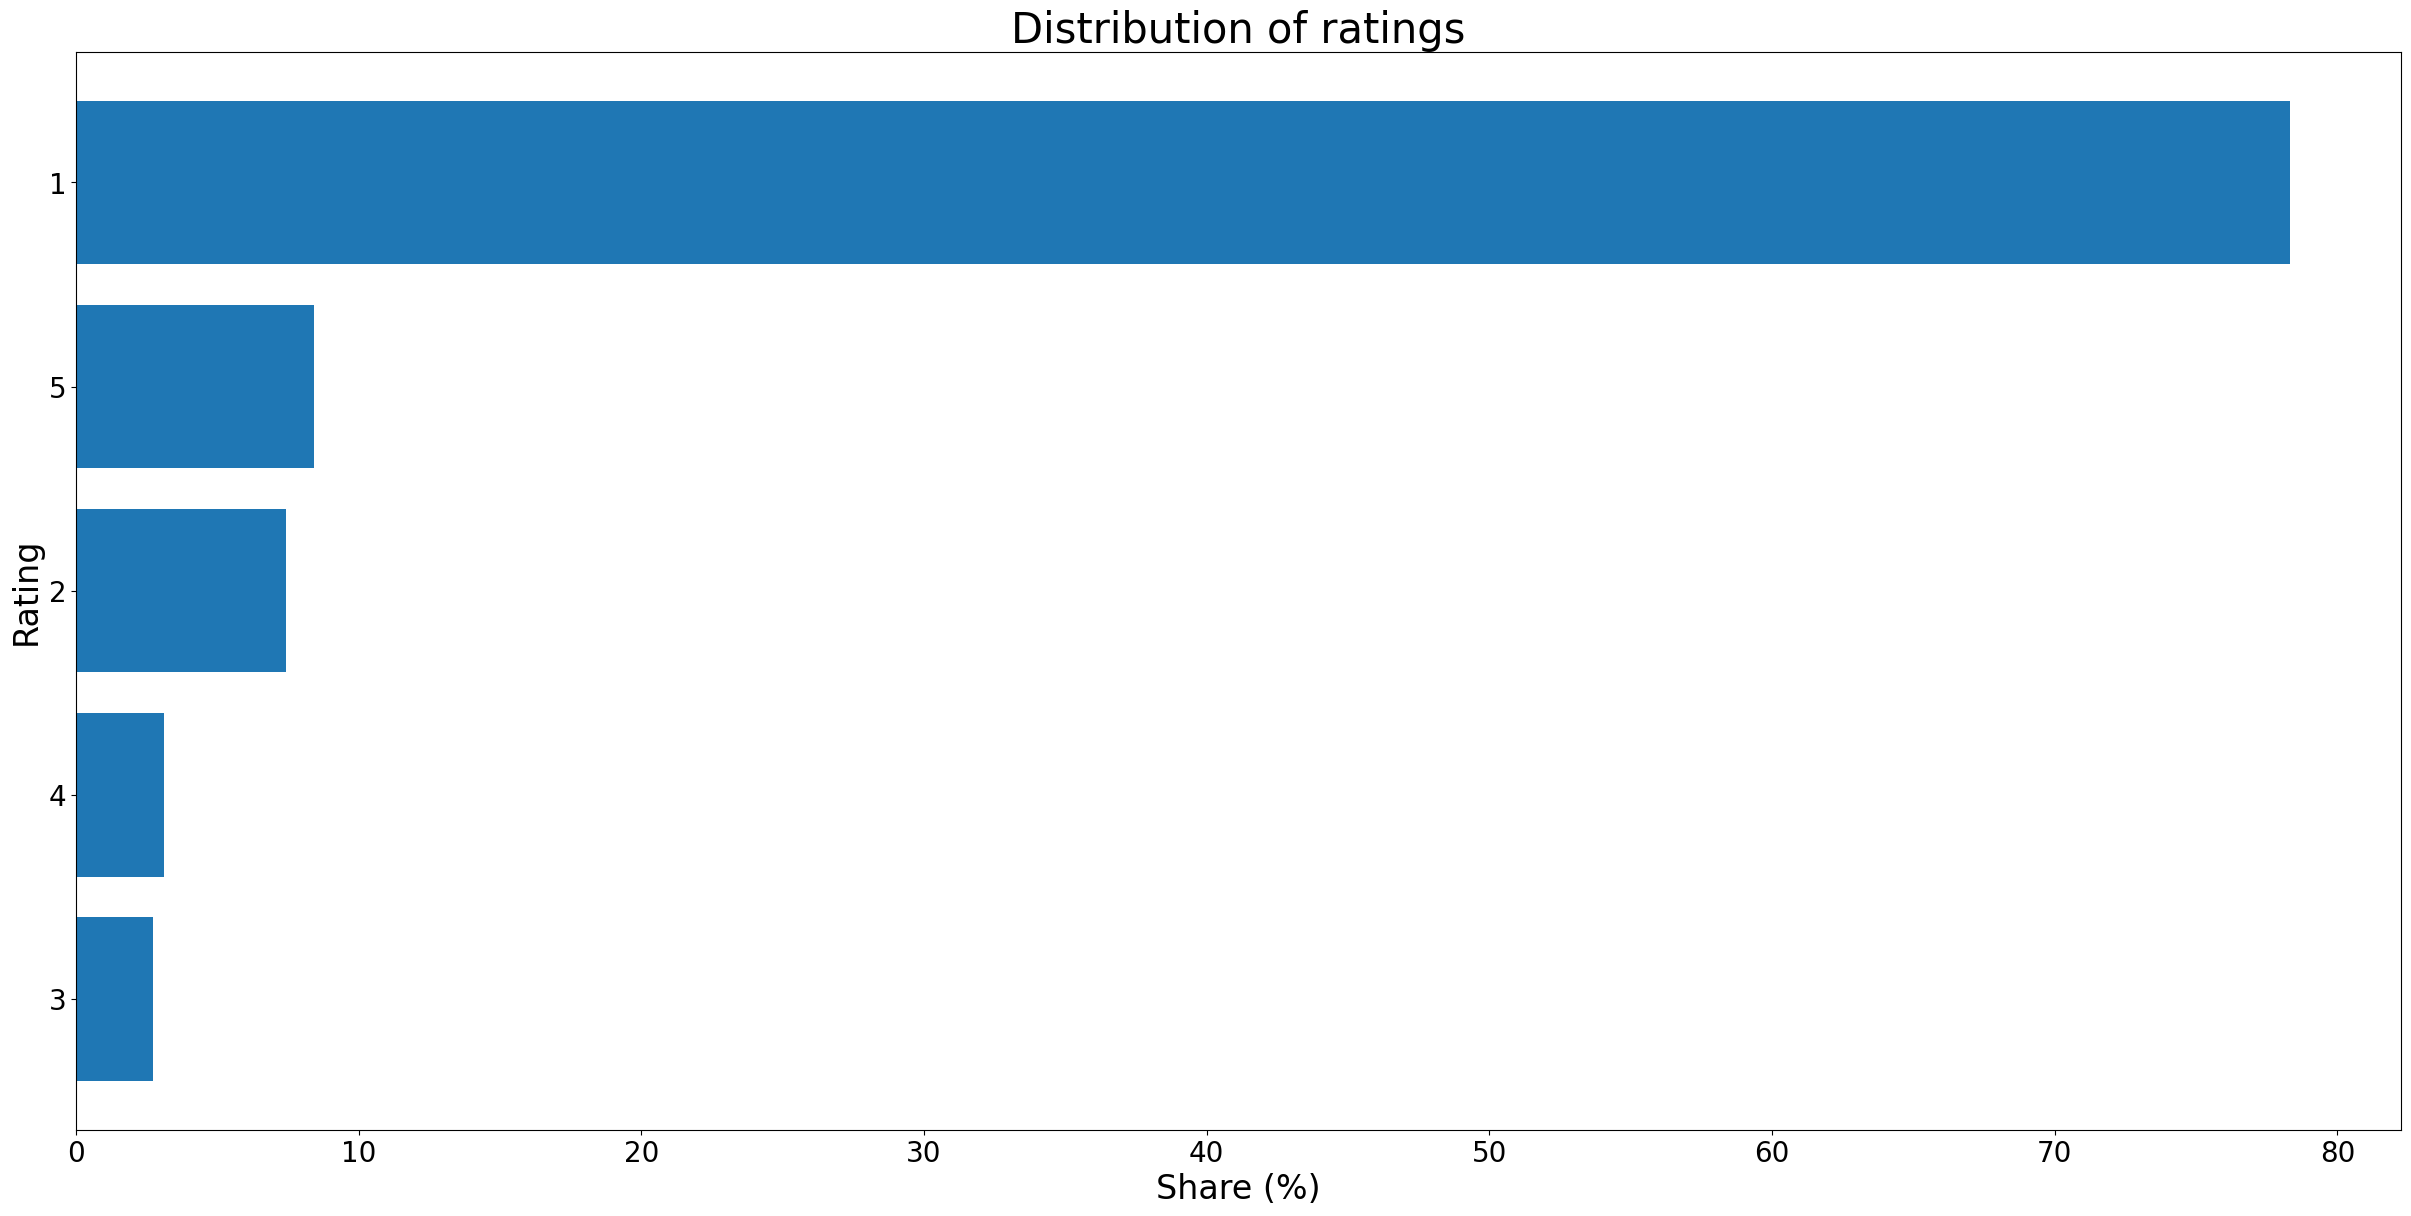

In [14]:
count = data_clean['rating'].value_counts(ascending=True)

plt.figure(figsize=(30,14))

plt.barh(count.keys().tolist(),count.values*100/sum(count.values))
plt.title('Distribution of ratings',fontsize=30)
plt.ylabel('Rating',fontsize=24)
plt.xlabel('Share (%)',fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The table below also confirms the above - looking at top 6 companies, they all have high numbers of 1-star reviews.

In [15]:
ratings_dist = data_clean.groupby(['company_name','rating']).count().\
pivot_table(index='company_name',columns='rating',values='stars').fillna(0).astype(int)
ratings_dist

rating,1,2,3,4,5
company_name,,,,,
arrivatrainswales,15,2,0,0,3
chilternrailways,5,0,0,3,0
crosscountrytrains,20,0,0,0,0
eastmidlandstrains,17,1,0,1,1
eurostar,145,13,7,7,8
grandcentralrail,11,4,2,0,2
gwr,159,6,3,5,7
hulltrains,0,0,0,1,1
londonnorthwesternrailway,7,1,0,0,0


----

In [16]:
data_for_rag = data_clean[['title', 'text']]
data_for_rag.head(3)

,title,text
0,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...
1,Pretty awful service,I phoned National rail to find out why several...
2,Awful staff,I travel from Brokenhast to southampton centra...


In [17]:
data_for_rag['ID'] = [i for i in range(len(data_for_rag))]
data_for_rag.head(3)

/var/folders/jn/cgjd1rm57sg74zycnrny1h_h0000gn/T/ipykernel_11527/1411456195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_rag['ID'] = [i for i in range(len(data_for_rag))]


,title,text,ID
0,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...,0
1,Pretty awful service,I phoned National rail to find out why several...,1
2,Awful staff,I travel from Brokenhast to southampton centra...,2


In [18]:
data_for_rag = data_for_rag.rename(columns={'title':'Title', 'text': 'Text'})
data_for_rag = data_for_rag[['ID','Title','Text']]
data_for_rag.head(3)

,ID,Title,Text
0,0,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...
1,1,Pretty awful service,I phoned National rail to find out why several...
2,2,Awful staff,I travel from Brokenhast to southampton centra...


In [19]:
#data_for_rag.to_csv('../data/rag_data.csv', encoding='utf-8', index=False)

---

Let's get embeddings for our text data and store them in Pinecone vector database:

In [20]:
from langchain_pinecone import PineconeVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain.document_loaders import CSVLoader

from src.variables import environment_vars

In [21]:
os.environ["OPENAI_API_KEY"] = environment_vars.openai_api_key
os.environ["PINECONE_API_KEY"] = environment_vars.pinecone_api_key

In [22]:
loader = CSVLoader(file_path="../data/rag_data.csv")
docs = loader.load()

In [23]:
embeddings = OpenAIEmbeddings()

In [24]:
len(docs)

1440

In [25]:
vectorstore = PineconeVectorStore.from_documents(docs, embeddings, index_name=environment_vars.pinecone_index_name)

Done!